In [9]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# loading data
file_path = '/kaggle/input/retail/Online Retail.xlsx'
retail = pd.read_excel(file_path)

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(541909, 8)

In [5]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
retail['Total_Purchase'] = retail['Quantity']*retail['UnitPrice']

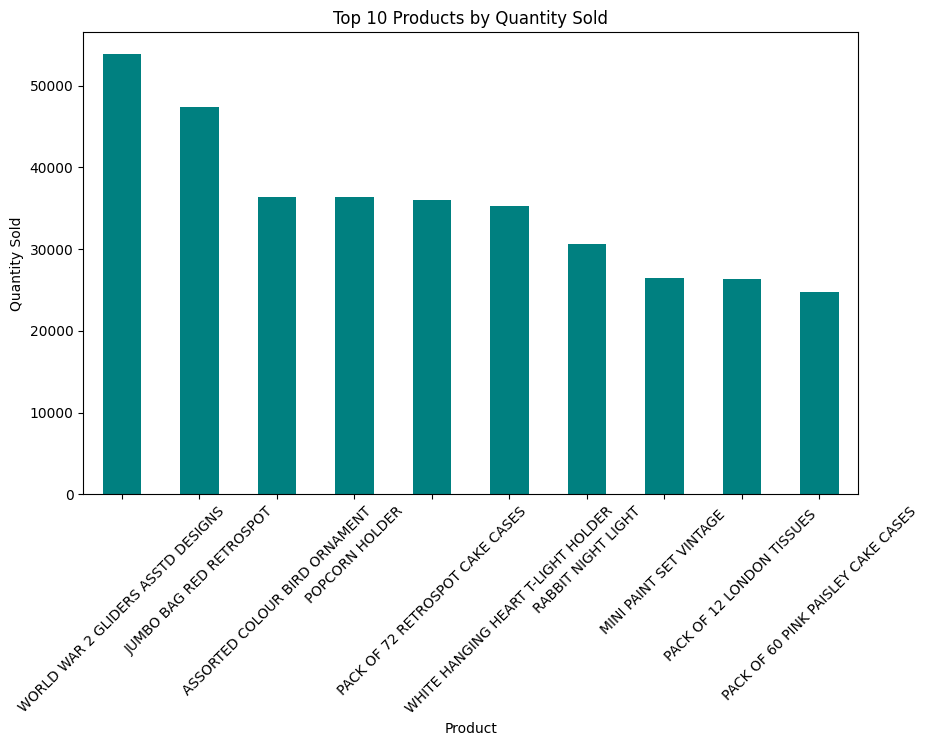

In [10]:
top_products = retail.groupby('Description')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='teal')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_30/3927083843.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = retail.set_index('InvoiceDate').resample('M')['Quantity'].sum()


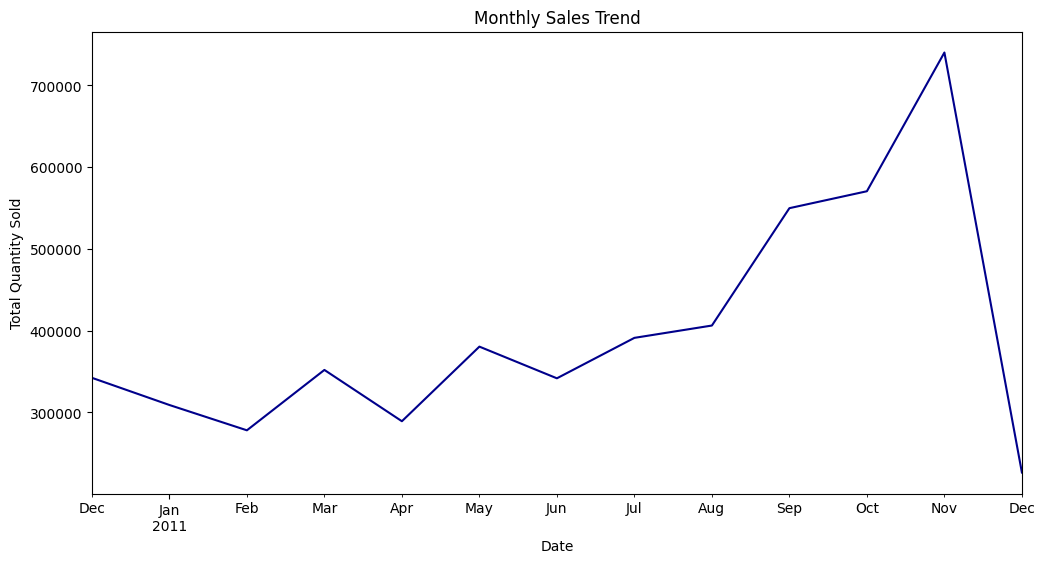

In [13]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
sales_trend = retail.set_index('InvoiceDate').resample('M')['Quantity'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(color='darkblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show();


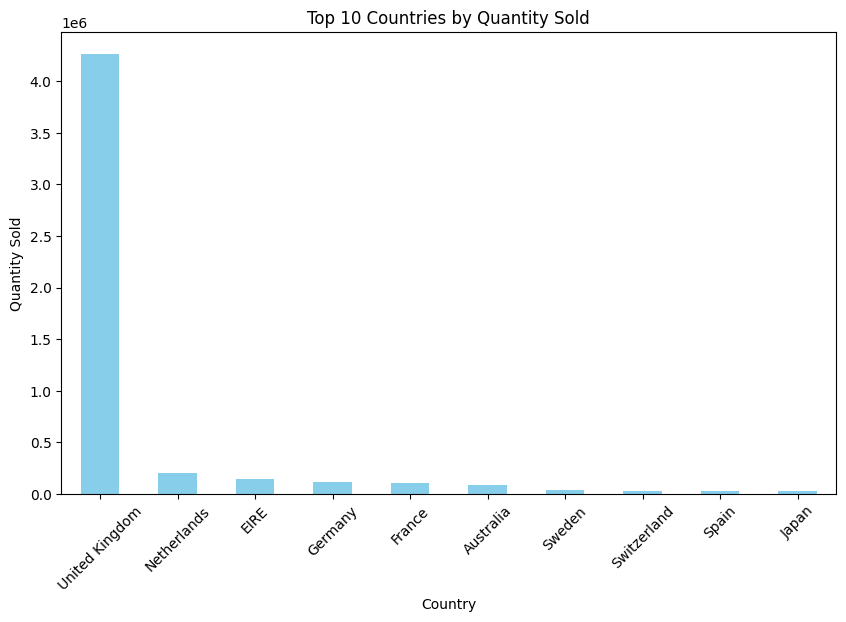

In [14]:
country_sales = retail.groupby('Country')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)b
plt.show();


/tmp/ipykernel_30/1361154216.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_customers = retail.set_index('InvoiceDate').resample('M')['CustomerID'].nunique()


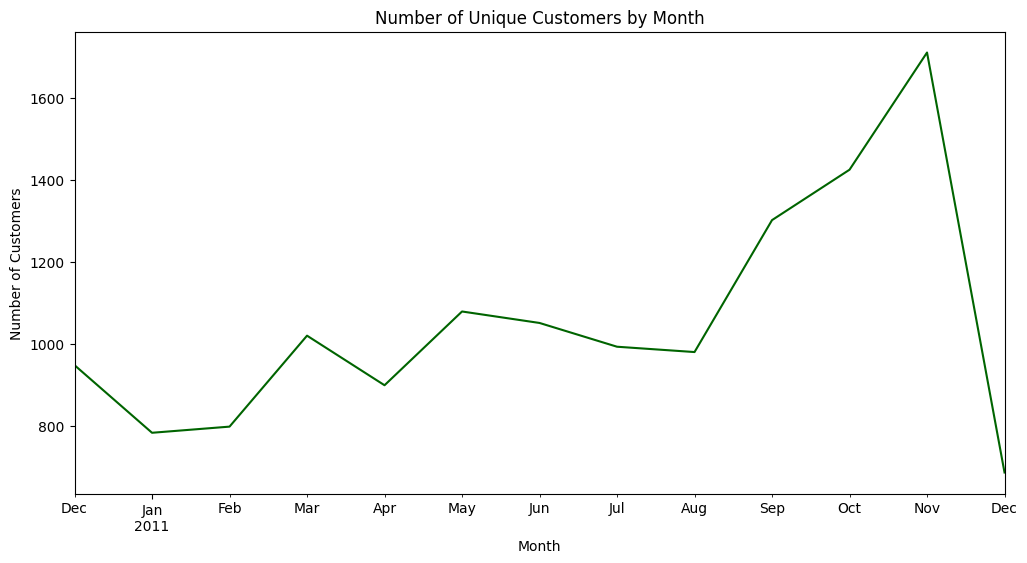

In [17]:
monthly_customers = retail.set_index('InvoiceDate').resample('M')['CustomerID'].nunique()
plt.figure(figsize=(12, 6))
monthly_customers.plot(color='darkgreen')
plt.title('Number of Unique Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show();


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


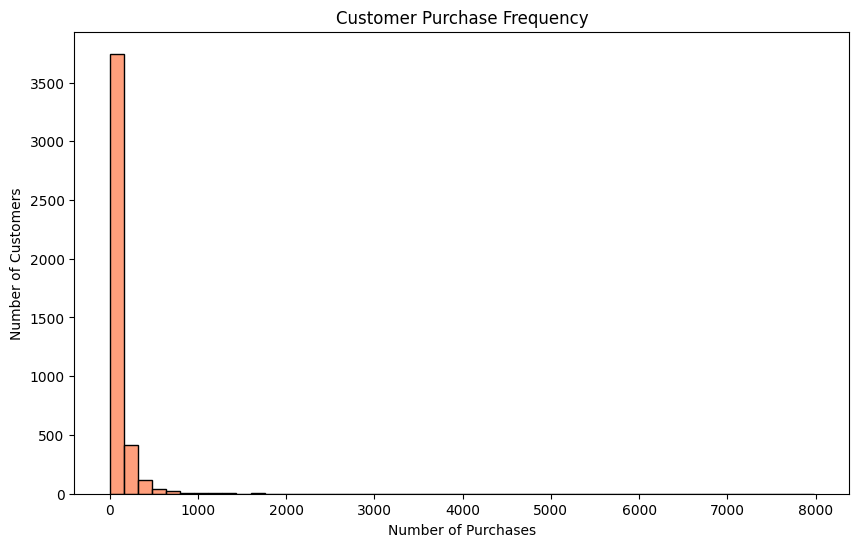

In [22]:
purchase_frequency = retail['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, bins=50, color='coral')
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


In [23]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
# Step 1: Data Preparation
# Remove rows with missing CustomerID or zero quantity
retail = retail.dropna(subset=['CustomerID'])
retail = retail[retail['Quantity'] > 0]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
# Group by CustomerID to calculate aggregate metrics for each customer
customer_data = retail.groupby('CustomerID').agg({
    'Quantity': 'sum',             # Total quantity purchased
    'Total_Purchase': 'sum',          # Total spending
    'InvoiceNo': 'nunique',        # Purchase frequency
    'Country': 'first'             # Retain the country
}).reset_index()
customer_data.head()

,CustomerID,Quantity,Total_Purchase,InvoiceNo,Country
0,12346.0,74215,77183.60,1,United Kingdom
1,12347.0,2458,4310.00,7,Iceland
2,12348.0,2341,1797.24,4,Finland
3,12349.0,631,1757.55,1,Italy
4,12350.0,197,334.40,1,Norway


In [26]:
# Select only numerical features for clustering
features = customer_data[['Quantity', 'Total_Purchase', 'InvoiceNo']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

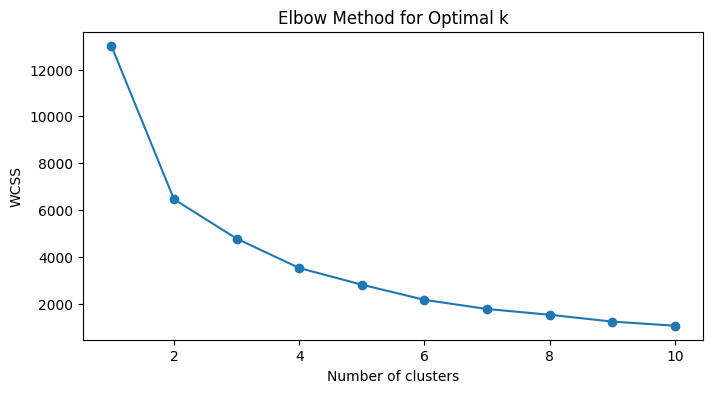

In [27]:
# Step 4: Determine Optimal Number of Clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [28]:
# Choose a reasonable number of clusters based on the elbow
optimal_clusters = 3

In [29]:
# Choosing a K-means Clustering model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# Evaluation with Silhouette Score
sil_score = silhouette_score(scaled_features, customer_data['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.9317440707218629


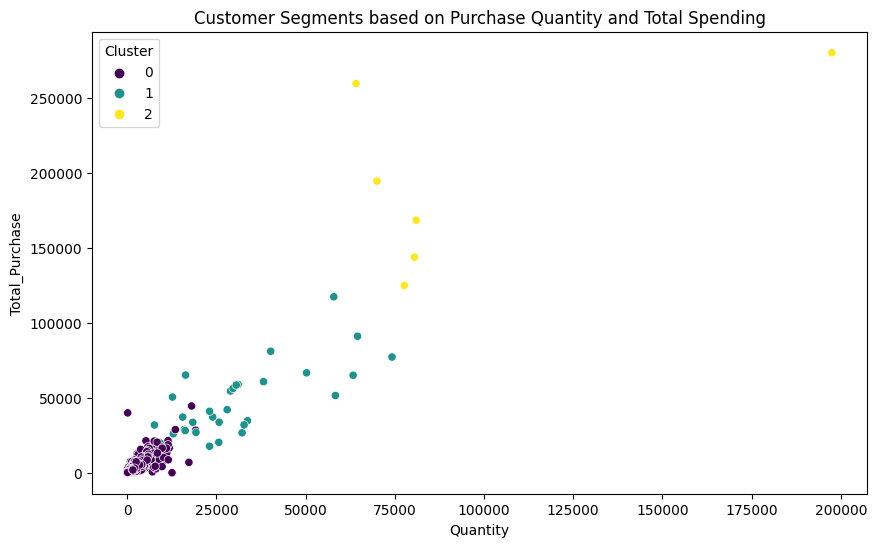

In [31]:
# Interpretation and Visualization
# Visualize clusters in terms of TotalAmount and Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Quantity', y='Total_Purchase', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchase Quantity and Total Spending')
plt.show()

In [32]:
# Segment Profiling
# Calculate average metrics for each cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Quantity': 'mean',
    'Total_Purchase': 'mean',
    'InvoiceNo': 'mean',
    'Country': lambda x: x.mode()[0]  # Most common country in the segment
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Output the segmented data for analysis
customer_data.to_csv('segmented_customers.csv', index=False)

Cluster Summary:
   Cluster      Quantity  Total_Purchase  InvoiceNo         Country
0        0    845.580930     1452.225531   3.837209  United Kingdom
1        1  29542.666667    45309.452121  49.454545  United Kingdom
2        2  95131.666667   195271.033333  67.333333  United Kingdom
